In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, mode

In [9]:
# Load your dataset
df = pd.read_csv(r'C:\Users\vicky\Downloads/CAR DETAILS FROM CAR DEKHO.csv')

year -> Mean: 2013.09, Median:2014.00, Mode: nan
selling_price -> Mean: 504127.31, Median:350000.00, Mode: nan
km_driven -> Mean: 66215.78, Median:60000.00, Mode: nan


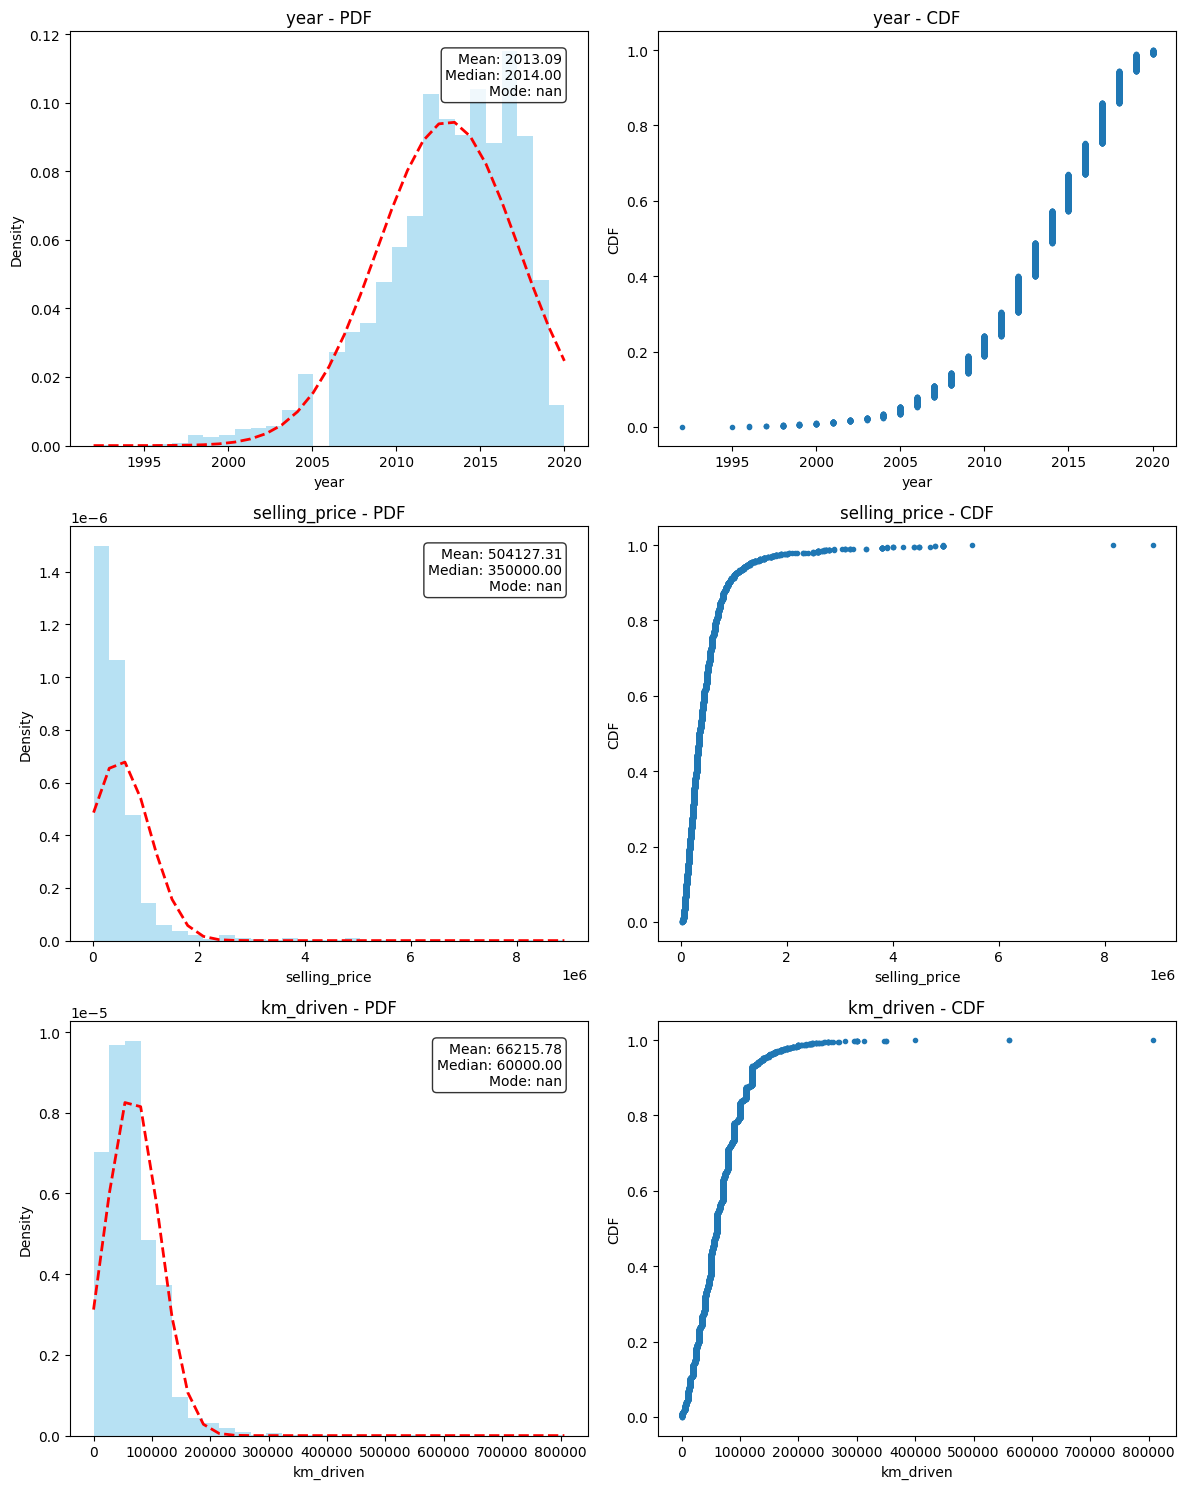

In [10]:
# Keep only numeric columns for analysis
numeric_data = df.select_dtypes(include=np.number)

num_features = len(numeric_data.columns)
fig, axes = plt.subplots(num_features, 2, figsize=(12, 5*num_features))

for i, col in enumerate(numeric_data.columns):
    values = numeric_data[col].dropna()
    
    # Statistics
    mean_val = values.mean()
    median_val = values.median()
    
    # Safe mode calculation to avoid IndexError
    mode_result = mode(values, nan_policy='omit')
    if hasattr(mode_result.mode, '__len__') and len(mode_result.mode) > 0:
        mod = mode_result.mode[0]
    else:
        mod = np.nan  # fallback if mode cannot be determined
    
    # Print to console
    print(f"{col} -> Mean: {mean_val:.2f}, Median:{median_val:.2f}, Mode: {mod:.2f}")
    
    # PDF
    ax_pdf = axes[i, 0] if num_features > 1 else axes[0]
    count, bins, ignored = ax_pdf.hist(values, bins=30, density=True, alpha=0.6,
    color='skyblue')
    ax_pdf.plot(bins, norm.pdf(bins, mean_val, values.std()), 'r--', linewidth=2)
    ax_pdf.set_title(f'{col} - PDF')
    ax_pdf.set_xlabel(col)
    ax_pdf.set_ylabel('Density')
    stats_text = f"Mean: {mean_val:.2f}\nMedian: {median_val:.2f}\nMode: {mod:.2f}"
    ax_pdf.text(0.95, 0.95, stats_text, transform=ax_pdf.transAxes,
                verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # CDF
    ax_cdf = axes[i, 1] if num_features > 1 else axes[1]
    sorted_vals = np.sort(values)
    cdf = np.arange(1, len(sorted_vals)+1) / len(sorted_vals)
    ax_cdf.plot(sorted_vals, cdf, marker='.', linestyle='none')
    ax_cdf.set_title(f'{col} - CDF')
    ax_cdf.set_xlabel(col)
    ax_cdf.set_ylabel('CDF')

plt.tight_layout()
plt.show()